In [24]:
import pandas as pd   
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import regex as re

In [25]:
df=pd.read_csv('covid_worldwide.csv', index_col=0)


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 231 entries, 1 to 231
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Country          231 non-null    object
 1   Total Cases      231 non-null    object
 2   Total Deaths     225 non-null    object
 3   Total Recovered  210 non-null    object
 4   Active Cases     212 non-null    object
 5   Total Test       213 non-null    object
 6   Population       228 non-null    object
dtypes: object(7)
memory usage: 14.4+ KB


In [27]:
df.head(10)

,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Test,Population
Serial Number,,,,,,,
1,USA,"104,196,861","1,132,935","101,322,779","1,741,147","1,159,832,679","334,805,269"
2,India,"44,682,784","530,740","44,150,289","1,755","915,265,788","1,406,631,776"
3,France,"39,524,311","164,233","39,264,546","95,532","271,490,188","65,584,518"
4,Germany,"37,779,833","165,711","37,398,100","216,022","122,332,384","83,883,596"
5,Brazil,"36,824,580","697,074","35,919,372","208,134","63,776,166","215,353,593"
6,Japan,"32,588,442","68,399","21,567,425","10,952,618","92,144,639","125,584,838"
7,S. Korea,"30,197,066","33,486","29,740,877","422,703","15,804,065","51,329,899"
8,Italy,"25,453,789","186,833","25,014,986","251,970","265,478,247","60,262,770"
9,UK,"24,274,361","204,171","24,020,088","50,102","522,526,476","68,497,907"


In [28]:
df.describe()

,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Test,Population
count,231,231,225,210,212,213,228
unique,231,231,213,210,181,212,228
top,Isle of Man,"25,453,789",38,"325,934",0,"78,646","63,298,550"
freq,1,1,3,1,8,2,1


In [29]:
df.columns = df.columns.str.replace(' ', '_')

# Converting the strings into floats


In [30]:
df['Total_Deaths'] = df['Total_Deaths'].astype(str).str.replace(',', '').astype(float)

In [31]:
df['Total_Cases'] = df['Total_Cases'].astype(str).str.replace(',', '').astype(float)

In [32]:
df['Total_Recovered'] = df['Total_Recovered'].astype(str).str.replace(',', '').astype(float)

In [33]:
df['Active_Cases'] = df['Active_Cases'].astype(str).str.replace(',', '').astype(float)

In [34]:
df['Total_Test'] = df['Total_Test'].astype(str).str.replace(',', '').astype(float)

In [35]:
df['Population'] = df['Population'].astype(str).str.replace(',', '').astype(float)

# Organising the data into top 10 countries with the most deaths


In [36]:
Topdeaths = df[['Total_Deaths', 'Country']].sort_values(by="Total_Deaths",ascending=False)
Topdeaths = Topdeaths.head(10)
Topdeaths.head(10)

,Total_Deaths,Country
Serial Number,,
1,1132935.0,USA
5,697074.0,Brazil
2,530740.0,India
10,395108.0,Russia
19,332198.0,Mexico
35,218931.0,Peru
9,204171.0,UK
8,186833.0,Italy
4,165711.0,Germany


# Bar Graph to show the countries with the top 10 amount of deaths

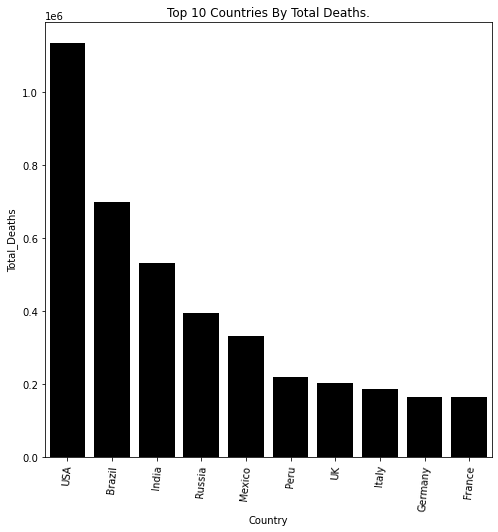

In [37]:
plt.figure(figsize=(8,8))
graph=sns.barplot(y='Total_Deaths',x='Country', color="black",data=Topdeaths)
graph.set_title('Top 10 Countries By Total Deaths.')
plt.xticks(rotation=85)
plt.show()

USA, Brazil and India had the most deaths

# Organising the data to show top 10 countries with the most amount of recovered 

In [38]:
Toprecover = df[['Total_Recovered', 'Country']].sort_values(by="Total_Recovered",ascending=False)
Toprecover = Toprecover.head(10)
Toprecover.head(10)

,Total_Recovered,Country
Serial Number,,
1,101322779.0,USA
2,44150289.0,India
3,39264546.0,France
4,37398100.0,Germany
5,35919372.0,Brazil
7,29740877.0,S. Korea
8,25014986.0,Italy
9,24020088.0,UK
6,21567425.0,Japan


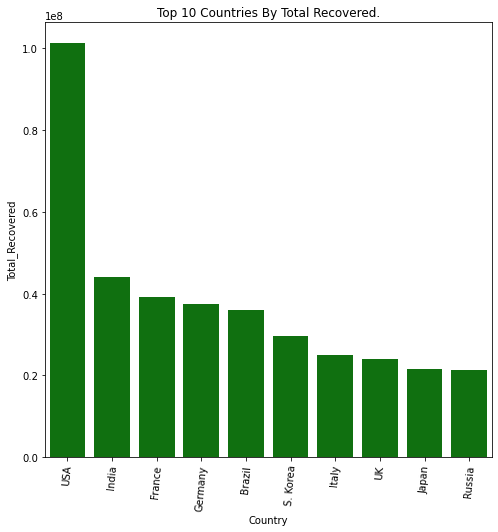

In [39]:
plt.figure(figsize=(8,8))
graph=sns.barplot(y='Total_Recovered',x='Country', color="green",data=Toprecover)
graph.set_title('Top 10 Countries By Total Recovered.')
plt.xticks(rotation=85)
plt.show()

USA, India and France had the most recovered cases


# Compare the Deaths versus Recoveries for Top 10 countries with most deaths

In [40]:
compare = df[['Total_Deaths', 'Country','Total_Recovered']].sort_values(by="Total_Deaths",ascending=False)
compare = compare.head(10)
compare.head(10)

,Total_Deaths,Country,Total_Recovered
Serial Number,,,
1,1132935.0,USA,101322779.0
5,697074.0,Brazil,35919372.0
2,530740.0,India,44150289.0
10,395108.0,Russia,21356008.0
19,332198.0,Mexico,6606633.0
35,218931.0,Peru,4258688.0
9,204171.0,UK,24020088.0
8,186833.0,Italy,25014986.0
4,165711.0,Germany,37398100.0


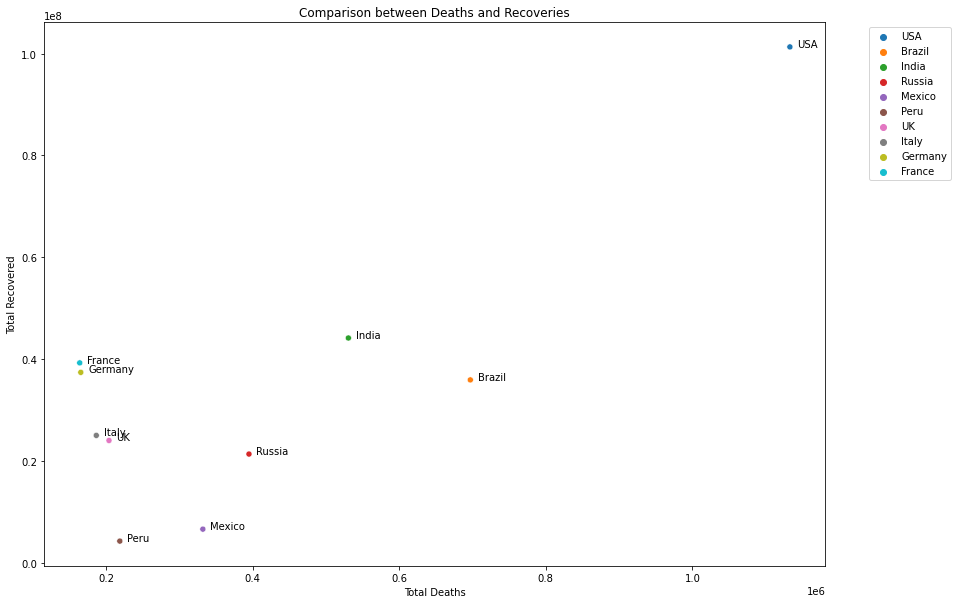

In [41]:
plt.figure(figsize=(14, 10))

sns.scatterplot(data=compare, x='Total_Deaths', y='Total_Recovered', hue='Country')

# Add axis labels and title
plt.xlabel('Total Deaths')
plt.ylabel('Total Recovered')
plt.title('Comparison between Deaths and Recoveries')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
for index, row in compare.iterrows():
    plt.text(row['Total_Deaths'] + 10000, row['Total_Recovered'] + 10000, row['Country'])
plt.show()

# Compare Deaths with largest Population sizes


In [42]:
popDeath = df[['Total_Deaths','Country','Population']].sort_values(by="Population",ascending=False)
popDeath = popDeath.head(10)
popDeath.head(10)

,Total_Deaths,Country,Population
Serial Number,,,
2,530740.0,India,1.406632e+09
1,1132935.0,USA,3.348053e+08
20,160817.0,Indonesia,2.791345e+08
53,30640.0,Pakistan,2.294890e+08
108,3155.0,Nigeria,2.167469e+08
5,697074.0,Brazil,2.153536e+08
48,29442.0,Bangladesh,1.678857e+08
10,395108.0,Russia,1.458059e+08
19,332198.0,Mexico,1.315628e+08


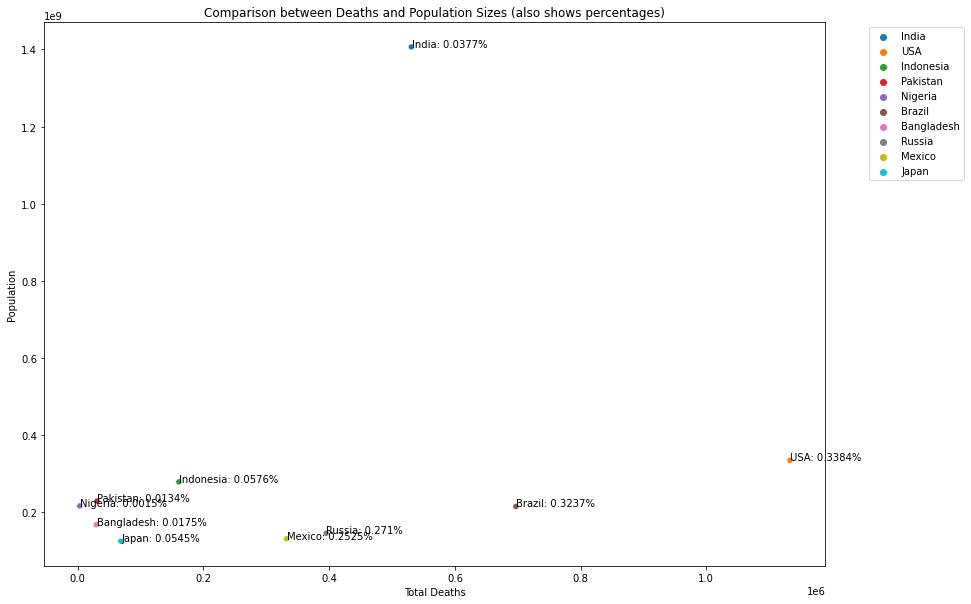

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the scatter plot
plt.figure(figsize=(14, 10))
sns.scatterplot(data=popDeath, x='Total_Deaths', y='Population', hue='Country')
plt.xlabel('Total Deaths')
plt.ylabel('Population')
plt.title('Comparison between Deaths and Population Sizes (also shows percentages)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Calculate and display the percentage of deaths per population for each country
for index, row in popDeath.iterrows():
    deaths = row['Total_Deaths']
    population = row['Population']
    percent_deaths = round(deaths / population * 100, 4)
    plt.text(deaths + 500, population + 500, f'{row["Country"]}: {percent_deaths}%', fontsize=10)

plt.show()
